# Q1

Written By Clareee1

In [1]:
##Q1
import pandas as pd
import numpy as np
from datetime import datetime
travel_df = pd.read_json('q1_data.json')
travel_df.head()

,session_id,unix_timestamp,cities,user
0,[X061RFWB06K9V],[1442503708],"[New York NY, Newark NJ]","[[{'user_id': 2024, 'joining_date': '2015-03-2..."
1,[5AZ2X2A9BHH5U],[1441353991],"[New York NY, Jersey City NJ, Philadelphia PA]","[[{'user_id': 2853, 'joining_date': '2015-03-2..."
2,[SHTB4IYAX4PX6],[1440843490],[San Antonio TX],"[[{'user_id': 10958, 'joining_date': '2015-03-..."
3,[JBRB8MZGTX3M4],[1427268063],[Edmonton AB],"[[{'user_id': 7693, 'joining_date': '2015-03-1..."
4,[YJCMPURC2FL9C],[1430559067],"[Phoenix AZ, Houston TX]","[[{'user_id': 7506, 'joining_date': '2015-02-2..."


In [2]:
#extract the nested jason object
df=travel_df.stack().str[0].unstack()
df=df.assign(cities=df['cities'].str.split(',')).explode('cities')
df=df.assign(**pd.DataFrame(df.pop('user').str[0].tolist()))
##convert timestamp into date time
df['unix_timestamp']=pd.to_datetime(df['unix_timestamp'], unit='s').astype(str).str[:10]
del df['_row']
df

,session_id,unix_timestamp,cities,user_id,joining_date,country
0,X061RFWB06K9V,2015-09-17,New York NY,2024,2015-03-22,UK
0,X061RFWB06K9V,2015-09-17,Newark NJ,2024,2015-03-22,UK
1,5AZ2X2A9BHH5U,2015-09-04,New York NY,2024,2015-03-22,UK
1,5AZ2X2A9BHH5U,2015-09-04,Jersey City NJ,2024,2015-03-22,UK
1,5AZ2X2A9BHH5U,2015-09-04,Philadelphia PA,2024,2015-03-22,UK
...,...,...,...,...,...,...
20018,9HCZDQMGU5Z2G,2015-06-16,Chicago IL,4422,2015-03-14,DE
20019,73ZWORX75Y9A0,2015-08-03,Chicago IL,446,2015-03-31,ES
20020,DMWGV9HY74G9T,2015-06-25,Calgary AB,8515,2015-03-22,ES
20020,DMWGV9HY74G9T,2015-06-25,New York NY,8515,2015-03-22,ES


In [3]:
df.index = np.arange(0, len(df))
df

,session_id,unix_timestamp,cities,user_id,joining_date,country
0,X061RFWB06K9V,2015-09-17,New York NY,2024,2015-03-22,UK
1,X061RFWB06K9V,2015-09-17,Newark NJ,2024,2015-03-22,UK
2,5AZ2X2A9BHH5U,2015-09-04,New York NY,2024,2015-03-22,UK
3,5AZ2X2A9BHH5U,2015-09-04,Jersey City NJ,2024,2015-03-22,UK
4,5AZ2X2A9BHH5U,2015-09-04,Philadelphia PA,2024,2015-03-22,UK
...,...,...,...,...,...,...
33011,9HCZDQMGU5Z2G,2015-06-16,Chicago IL,4422,2015-03-14,DE
33012,73ZWORX75Y9A0,2015-08-03,Chicago IL,446,2015-03-31,ES
33013,DMWGV9HY74G9T,2015-06-25,Calgary AB,8515,2015-03-22,ES
33014,DMWGV9HY74G9T,2015-06-25,New York NY,8515,2015-03-22,ES


##### EDA

In [4]:
print("unix_timestamp: ")
print(df['unix_timestamp'].value_counts().sort_index())

unix_timestamp: 
2015-02-28      2
2015-03-01     10
2015-03-02     24
2015-03-03     20
2015-03-04     43
             ... 
2015-09-28    159
2015-09-29    144
2015-09-30    199
2015-10-01    150
2015-10-02      4
Name: unix_timestamp, Length: 217, dtype: int64


In [5]:
print("session: ")
print(df['session_id'].value_counts().sort_values(ascending=[False]))

session: 
KHH2D79TU73O6    11
PGBYV8JNV13LC     9
X0UD44Z9EF7ZI     8
GPMBRPR9EYZA7     8
3R4UV4V398B60     8
                 ..
L7EBCV7GUI5MM     1
GNXFP4OJVXEFF     1
4Q6HA558ZW4NY     1
AS0W8CCAB7NJ1     1
HPB2H8KBYGLW9     1
Name: session_id, Length: 20022, dtype: int64


In [6]:
print("unique city: ")
print(df['cities'].value_counts())
print("-------------------")
print("city search freq: ")
print(df['cities'].value_counts()/df.shape[0])
print("-------------------")
print("unqiue city by session: ")
df.groupby(['session_id', 'cities']).count()

unique city: 
New York NY        3994
Toronto ON         2323
Los Angeles CA     1985
Montreal QC        1667
Chicago IL         1405
                   ... 
 Omaha NE             3
 Greensboro NC        2
 Kansas City MO       2
 Pittsburgh PA        1
 New Orleans LA       1
Name: cities, Length: 107, dtype: int64
-------------------
city search freq: 
New York NY        0.120972
Toronto ON         0.070360
Los Angeles CA     0.060122
Montreal QC        0.050491
Chicago IL         0.042555
                     ...   
 Omaha NE          0.000091
 Greensboro NC     0.000061
 Kansas City MO    0.000061
 Pittsburgh PA     0.000030
 New Orleans LA    0.000030
Name: cities, Length: 107, dtype: float64
-------------------
unqiue city by session: 


unix_timestamp  user_id  joining_date  country
session_id    cities                                                        
0004TZ56GY6S7  New York NY                 1        1             1        1
              San Diego CA                 1        1             1        1
004M08GLQ7ZXH Toronto ON                   1        1             1        1
007O320DQ7AXT New York NY                  1        1             1        1
007UIISVZJOW5 San Antonio TX               1        1             1        1
...                                      ...      ...           ...      ...
ZZWVLD5228M5Z Chicago IL                   1        1             1        1
ZZWX86DF4JBLT  Oshawa ON                   1        1             1        1
              Toronto ON                   1        1             1        1
ZZZGT1H4I13GM  Montreal QC                 1        1             1        1
              Detroit MI                   1        1             1        1

[33016 rows x 4 columns]

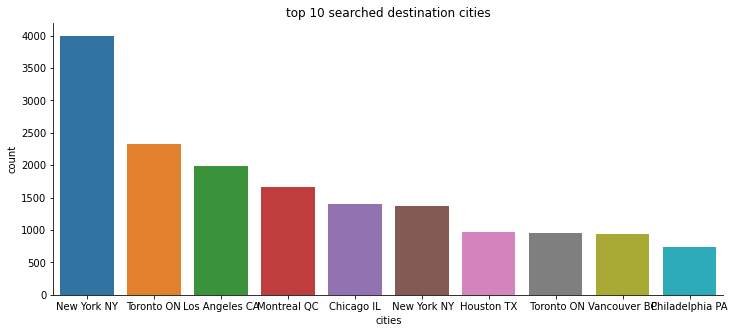

In [7]:
from kmodes.kmodes import KModes
from sklearn import preprocessing
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
sns.countplot(x='cities', data=df, order=df['cities'].value_counts().iloc[:10].index)
plt.title('top 10 searched destination cities')
sns.despine();

In [8]:
df.groupby('user_id').unix_timestamp.describe()

,count,unique,top,freq
user_id,,,,
4,10,6,2015-03-22,4
5,3,2,2015-04-21,2
9,11,5,2015-07-12,5
10,1,1,2015-03-25,1
11,5,3,2015-06-24,2
...,...,...,...,...
10981,3,2,2015-06-12,2
10982,8,6,2015-04-17,2
10988,2,1,2015-09-29,2


In [9]:
df.loc[df['user_id'] ==4]

,session_id,unix_timestamp,cities,user_id,joining_date,country
7908,UXQR80VT35QCJ,2015-05-10,New York NY,4,2015-03-18,DE
10887,V55X23SD6U7IP,2015-03-28,New York NY,4,2015-03-18,DE
10888,YH3425BT2OHL6,2015-06-18,Toronto ON,4,2015-03-18,DE
10889,YH3425BT2OHL6,2015-06-18,Los Angeles CA,4,2015-03-18,DE
11522,RPCPWTDJ0CSAD,2015-05-15,Dallas TX,4,2015-03-18,DE
24926,TGC9GFDD5XPIJ,2015-03-22,Los Angeles CA,4,2015-03-18,DE
24927,TGC9GFDD5XPIJ,2015-03-22,Bakersfield CA,4,2015-03-18,DE
24928,TGC9GFDD5XPIJ,2015-03-22,Fresno CA,4,2015-03-18,DE
24929,TGC9GFDD5XPIJ,2015-03-22,Stockton CA,4,2015-03-18,DE
24930,UTHFWCO7TFOUZ,2015-06-26,New York NY,4,2015-03-18,DE


In [10]:
# detect missing values
print("missing value:")
print(df.isnull().sum())
print("-------------------")
print("group by country:")
print(df.groupby('country').size())
# selecting unloaded country
unload_df = df.loc[df['country'] ==""]
unload_df

missing value:
session_id        0
unix_timestamp    0
cities            0
user_id           0
joining_date      0
country           0
dtype: int64
-------------------
group by country:
country
      4494
DE    6112
ES    3261
FR    3743
IT    3147
UK    5860
US    6399
dtype: int64


,session_id,unix_timestamp,cities,user_id,joining_date,country
17,FASF5QS8ARSGQ,2015-09-22,Los Angeles CA,8831,2015-03-02,
18,R9I7W4UA0Y8AM,2015-06-16,Phoenix AZ,8831,2015-03-02,
19,7NBQMFVHU0GAP,2015-04-20,New York NY,587,2015-03-16,
20,ZZBC8ZF2K3BLW,2015-06-13,Toronto ON,587,2015-03-16,
21,ZZBC8ZF2K3BLW,2015-06-13,Kitchener ON,587,2015-03-16,
...,...,...,...,...,...,...
32950,JNWKRXU1KIOCP,2015-08-16,Toronto ON,6391,2015-03-15,
32951,60JJTQCME54LC,2015-04-18,New York NY,4572,2015-03-31,
32956,QZAN7VLYQB9YM,2015-09-07,Los Angeles CA,1211,2015-03-23,
32978,MPCJABTE1B8UM,2015-05-04,Chicago IL,2997,2015-03-11,


In [11]:
unload_df_by_user = unload_df[['user_id']].groupby(['user_id']).size().nlargest(15)
print(unload_df_by_user)

##to get the unique user_id for unloaded countries
user_id_unload = unload_df['user_id'].unique()
print("type: ",type(user_id_unload))

##check whether the unloaded use_id has the duplicates record with the corresponding existing countries 
check_user_country = df.loc[df['user_id'].isin(user_id_unload)]
loaded_check = check_user_country.loc[df['country'] !=""]
print(loaded_check)

user_id
884     23
7203    23
1278    22
3244    22
4064    21
5523    21
547     19
2098    19
2652    19
3213    19
8270    19
8668    19
206     18
336     18
774     18
dtype: int64
type:  <class 'numpy.ndarray'>
Empty DataFrame
Columns: [session_id, unix_timestamp, cities, user_id, joining_date, country]
Index: []


The above assumption doesnt hold;
Further checking by searched city

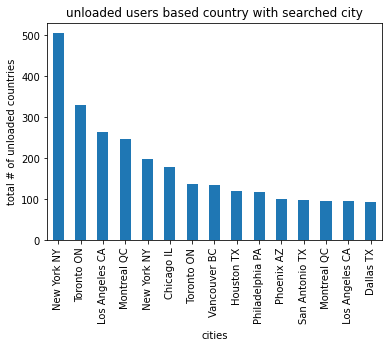

In [12]:
#unloaded user_country by searched city
bar_1 = unload_df.groupby("cities")['country'].count().nlargest(15)
bar_1.plot(kind='bar')
plt.ylabel('cities')
plt.ylabel('total # of unloaded countries')
plt.title('unloaded users based country with searched city')
plt.show()

##### Q: There was a bug in the code and one country didn't get logged. Can you guess which country? How?

A: Canada. 
I assume that the unloaded country is not part of the existing countries.
Among the top 10 cities in the unloaded country table, most are from Canada, with the remaining being in the US,
which means that those users prefer either travel to the US or CA.
With the geographical distance, CA is more likely to be the users' base country.

In [13]:
##fill the missing value
df = df.replace(r'^\s*$', 'CA', regex=True)
df.loc[df['country'] ==""]

,session_id,unix_timestamp,cities,user_id,joining_date,country


##### Q: For each city, find the most likely city to be also searched for within the same session.

In [14]:
#count the freqency that two cities have the same session_id
df2 = df[["session_id", "cities"]]
df3 = df[["session_id", "cities"]]
df_merge = pd.merge(df2, df3, on='session_id', how='left')
df_merge= df_merge[df_merge['cities_x'] != df_merge['cities_y']]

##tuple
df_merge['merge'] = df_merge[['cities_x','cities_y']].apply(tuple, axis=1)
df_merge['merge'] = [tuple(sorted(x)) for x in df_merge['merge']]
df_merge

,session_id,cities_x,cities_y,merge
1,X061RFWB06K9V,New York NY,Newark NJ,"( Newark NJ, New York NY)"
2,X061RFWB06K9V,Newark NJ,New York NY,"( Newark NJ, New York NY)"
5,5AZ2X2A9BHH5U,New York NY,Jersey City NJ,"( Jersey City NJ, New York NY)"
6,5AZ2X2A9BHH5U,New York NY,Philadelphia PA,"( Philadelphia PA, New York NY)"
7,5AZ2X2A9BHH5U,Jersey City NJ,New York NY,"( Jersey City NJ, New York NY)"
...,...,...,...,...
69732,NQKRTVPICV0SP,Vancouver BC,Houston TX,"( Vancouver BC, Houston TX)"
69736,17WJGZOEFEI4W,Chicago IL,Montreal QC,"( Montreal QC, Chicago IL)"
69737,17WJGZOEFEI4W,Montreal QC,Chicago IL,"( Montreal QC, Chicago IL)"
69742,DMWGV9HY74G9T,Calgary AB,New York NY,"( New York NY, Calgary AB)"


In [15]:
df_merge['count'] = df_merge.groupby(['merge']).transform('count').session_id
df_final = df_merge[[ "cities_x","cities_y","merge","count"]]
df_final

,cities_x,cities_y,merge,count
1,New York NY,Newark NJ,"( Newark NJ, New York NY)",820
2,Newark NJ,New York NY,"( Newark NJ, New York NY)",820
5,New York NY,Jersey City NJ,"( Jersey City NJ, New York NY)",1054
6,New York NY,Philadelphia PA,"( Philadelphia PA, New York NY)",638
7,Jersey City NJ,New York NY,"( Jersey City NJ, New York NY)",1054
...,...,...,...,...
69732,Vancouver BC,Houston TX,"( Vancouver BC, Houston TX)",36
69736,Chicago IL,Montreal QC,"( Montreal QC, Chicago IL)",112
69737,Montreal QC,Chicago IL,"( Montreal QC, Chicago IL)",112
69742,Calgary AB,New York NY,"( New York NY, Calgary AB)",100


In [16]:
a = df_final[df_final['count'] == df_final.groupby(['cities_x'])['count'].transform(max)]
b =a.drop_duplicates(subset = ["cities_y","merge","count"])
b.index = np.arange(0, len(b))
b

,cities_x,cities_y,merge,count
0,Newark NJ,New York NY,"( Newark NJ, New York NY)",820
1,New York NY,Jersey City NJ,"( Jersey City NJ, New York NY)",1054
2,Jersey City NJ,New York NY,"( Jersey City NJ, New York NY)",1054
3,Philadelphia PA,New York NY,"( Philadelphia PA, New York NY)",638
4,Kitchener ON,Toronto ON,"( Kitchener ON, Toronto ON)",230
...,...,...,...,...
153,San Jose CA,Fresno CA,"( Fresno CA, San Jose CA)",6
154,San Jose CA,San Francisco CA,"( San Francisco CA, San Jose CA)",6
155,Greensboro NC,Jacksonville FL,"( Greensboro NC, Jacksonville FL)",2
156,Greensboro NC,Atlanta GA,"( Atlanta GA, Greensboro NC)",2


The table shows the most likely searched cities within the same session. 
For example, the most frequently searched city for Newark, NJ is NEW York, 
while San Jose, on the other hand, has the similarity searched pairs 
with Fresno and SF for both are searched six times.

##### Algorithm that clusters sessions into two groups: high intent and low intent.


In [17]:
df_merge.index = np.arange(0, len(df_merge))
df_merge

,session_id,cities_x,cities_y,merge,count
0,X061RFWB06K9V,New York NY,Newark NJ,"( Newark NJ, New York NY)",820
1,X061RFWB06K9V,Newark NJ,New York NY,"( Newark NJ, New York NY)",820
2,5AZ2X2A9BHH5U,New York NY,Jersey City NJ,"( Jersey City NJ, New York NY)",1054
3,5AZ2X2A9BHH5U,New York NY,Philadelphia PA,"( Philadelphia PA, New York NY)",638
4,5AZ2X2A9BHH5U,Jersey City NJ,New York NY,"( Jersey City NJ, New York NY)",1054
...,...,...,...,...,...
36725,NQKRTVPICV0SP,Vancouver BC,Houston TX,"( Vancouver BC, Houston TX)",36
36726,17WJGZOEFEI4W,Chicago IL,Montreal QC,"( Montreal QC, Chicago IL)",112
36727,17WJGZOEFEI4W,Montreal QC,Chicago IL,"( Montreal QC, Chicago IL)",112
36728,DMWGV9HY74G9T,Calgary AB,New York NY,"( New York NY, Calgary AB)",100


In [18]:
##table join
df_merge=df_merge.rename(columns = {'cities_x':'cities'})
#new_df = pd.merge(df, b, on='cities', how='left')
new_df = pd.merge(df,df_merge, on=['session_id', 'cities'], how='inner')
new_df['weights'] = 1/new_df.groupby('session_id').transform('count')['count']
#new_df['session_number'] = new_df.groupby(['user_id'])['session_id'].transform('nunique')
#new_df.loc[new_df['user_id'] ==2024]
new_df

,session_id,unix_timestamp,cities,user_id,joining_date,country,cities_y,merge,count,weights
0,X061RFWB06K9V,2015-09-17,New York NY,2024,2015-03-22,UK,Newark NJ,"( Newark NJ, New York NY)",820,0.500000
1,X061RFWB06K9V,2015-09-17,Newark NJ,2024,2015-03-22,UK,New York NY,"( Newark NJ, New York NY)",820,0.500000
2,5AZ2X2A9BHH5U,2015-09-04,New York NY,2024,2015-03-22,UK,Jersey City NJ,"( Jersey City NJ, New York NY)",1054,0.166667
3,5AZ2X2A9BHH5U,2015-09-04,New York NY,2024,2015-03-22,UK,Philadelphia PA,"( Philadelphia PA, New York NY)",638,0.166667
4,5AZ2X2A9BHH5U,2015-09-04,Jersey City NJ,2024,2015-03-22,UK,New York NY,"( Jersey City NJ, New York NY)",1054,0.166667
...,...,...,...,...,...,...,...,...,...,...
36725,NQKRTVPICV0SP,2015-06-03,Vancouver BC,10478,2015-03-09,US,Houston TX,"( Vancouver BC, Houston TX)",36,0.500000
36726,17WJGZOEFEI4W,2015-05-02,Chicago IL,394,2015-03-02,DE,Montreal QC,"( Montreal QC, Chicago IL)",112,0.500000
36727,17WJGZOEFEI4W,2015-05-02,Montreal QC,394,2015-03-02,DE,Chicago IL,"( Montreal QC, Chicago IL)",112,0.500000
36728,DMWGV9HY74G9T,2015-06-25,Calgary AB,8515,2015-03-22,ES,New York NY,"( New York NY, Calgary AB)",100,0.500000


In [19]:
grouped = new_df.groupby('user_id')

def wavg(group):
    group['wavg'] = np.average(group['count'], weights=group.loc[:, "weights"])
    return group

user_wavg = grouped.apply(wavg)
user_wavg

,session_id,unix_timestamp,cities,user_id,joining_date,country,cities_y,merge,count,weights,wavg
0,X061RFWB06K9V,2015-09-17,New York NY,2024,2015-03-22,UK,Newark NJ,"( Newark NJ, New York NY)",820,0.500000,545.333333
1,X061RFWB06K9V,2015-09-17,Newark NJ,2024,2015-03-22,UK,New York NY,"( Newark NJ, New York NY)",820,0.500000,545.333333
2,5AZ2X2A9BHH5U,2015-09-04,New York NY,2024,2015-03-22,UK,Jersey City NJ,"( Jersey City NJ, New York NY)",1054,0.166667,545.333333
3,5AZ2X2A9BHH5U,2015-09-04,New York NY,2024,2015-03-22,UK,Philadelphia PA,"( Philadelphia PA, New York NY)",638,0.166667,545.333333
4,5AZ2X2A9BHH5U,2015-09-04,Jersey City NJ,2024,2015-03-22,UK,New York NY,"( Jersey City NJ, New York NY)",1054,0.166667,545.333333
...,...,...,...,...,...,...,...,...,...,...,...
36725,NQKRTVPICV0SP,2015-06-03,Vancouver BC,10478,2015-03-09,US,Houston TX,"( Vancouver BC, Houston TX)",36,0.500000,36.000000
36726,17WJGZOEFEI4W,2015-05-02,Chicago IL,394,2015-03-02,DE,Montreal QC,"( Montreal QC, Chicago IL)",112,0.500000,187.000000
36727,17WJGZOEFEI4W,2015-05-02,Montreal QC,394,2015-03-02,DE,Chicago IL,"( Montreal QC, Chicago IL)",112,0.500000,187.000000
36728,DMWGV9HY74G9T,2015-06-25,Calgary AB,8515,2015-03-22,ES,New York NY,"( New York NY, Calgary AB)",100,0.500000,173.800000


In [20]:
#created a column wavg with a weighted count by the similarity between searched cities

user_wavg = user_wavg.drop_duplicates(subset = ["user_id"])
user_wavg.index = np.arange(0, len(user_wavg))
user_wavg.drop(['cities_y','merge','count','weights','unix_timestamp'], axis=1, inplace=True)
user_wavg

D:\python\anaconda\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,session_id,cities,user_id,joining_date,country,wavg
0,X061RFWB06K9V,New York NY,2024,2015-03-22,UK,545.333333
1,YJCMPURC2FL9C,Phoenix AZ,2853,2015-03-28,DE,36.000000
2,YOVUIM79SGS5Y,Montreal QC,7693,2015-03-12,IT,340.000000
3,SHXEY67QWKP9K,Calgary AB,7506,2015-02-28,UK,205.888889
4,ZZBC8ZF2K3BLW,Toronto ON,587,2015-03-16,CA,206.266667
...,...,...,...,...,...,...
4253,J54ZJ93NAC2MQ,Phoenix AZ,9877,2015-03-24,US,117.000000
4254,AQ4Q04NP4DZMQ,New York NY,9520,2015-03-28,CA,276.000000
4255,YWWQ7ZLMDMMFG,Jacksonville FL,5144,2015-03-01,UK,72.000000
4256,9C5AR8TRWMORN,Philadelphia PA,1969,2015-03-15,US,208.000000


Text(0.5, 1.0, 'distribution of user weighted-average web searching similarity counts')

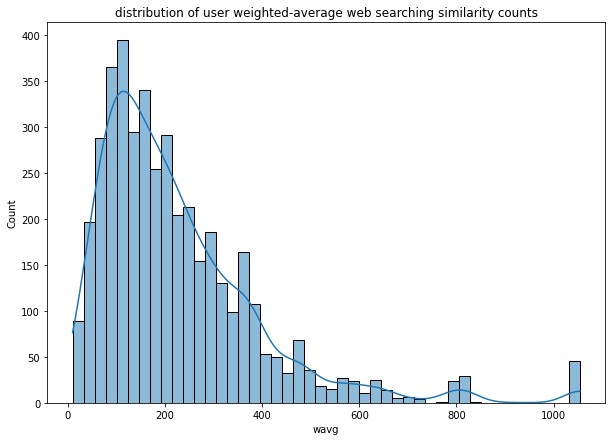

In [21]:
##k-clustering
#distribution plot
fig, ax = plt.subplots(figsize =(10, 7))
#distribution plot
sns.histplot(user_wavg['wavg'], kde=True)
plt.title('distribution of user weighted-average web searching similarity counts')

The wavg column contains values that is a bit right-skewed, 
need to move down the ladder of powers to standardize the data.

In [22]:
my_max = user_wavg['wavg'].loc[user_wavg['wavg'].idxmax()]      # max in column
print("Max wavg: ",my_max)

my_min = user_wavg['wavg'].loc[user_wavg['wavg'].idxmin()]      # min in column
print("min wavg: ",my_min)

Max wavg:  1054.0
min wavg:  10.0


In [23]:
##normalization for right-skewed
user_wavg = user_wavg[['user_id','wavg']]
user_wavg['wavg'] = np.log(user_wavg['wavg'] + 1)

D:\python\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0.5, 1.0, 'distribution of normalized user weighted-average web searching similarity counts')

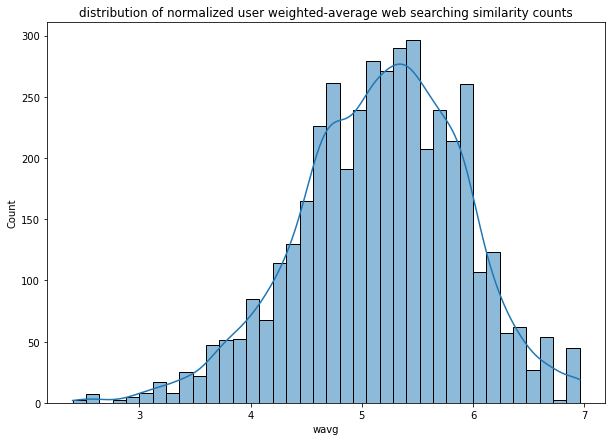

In [24]:
fig, ax = plt.subplots(figsize =(10, 7))
#distribution plot
sns.histplot(user_wavg['wavg'], kde=True)
plt.title('distribution of normalized user weighted-average web searching similarity counts')

In [25]:
# Split ALL columns
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
X = user_wavg[['user_id','wavg']].copy()
(X_train, X_test) = train_test_split(X,test_size=0.20)
# Cluster
kmeans = KMeans(2)
kmeans.fit(X_train[['wavg']])
# Save the labels
X_train.loc[:,'cluster_pred'] = kmeans.labels_
X_train

,user_id,wavg,cluster_pred
1890,10852,5.666427,0
2552,7983,5.090678,1
120,8141,5.883322,0
260,3777,5.917997,0
223,5751,3.891820,1
...,...,...,...
877,3081,5.003946,1
1731,3806,3.390024,1
2818,9638,5.446737,0
2549,3489,5.761003,0


##### Cluster Analysis

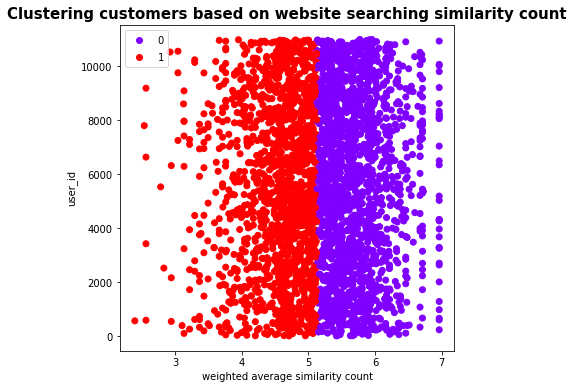

In [26]:
plt.figure(figsize=(6,6))
scatter = plt.scatter(X_train['wavg'],X_train['user_id'],c=X_train['cluster_pred'],cmap='rainbow')
plt.title("Clustering customers based on website searching similarity count", fontsize=15,fontweight="bold")
plt.xlabel("weighted average similarity count")
plt.ylabel("user_id")
plt.legend(*scatter.legend_elements())
plt.show()

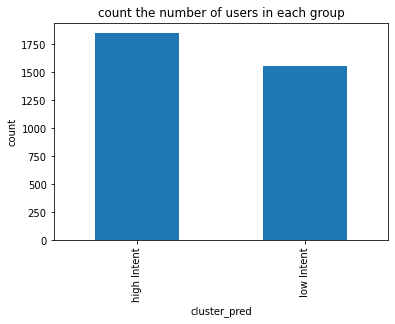

cluster_pred
high Intent    1851
low Intent     1555
Name: user_id, dtype: int64


In [27]:
#count the number in each group
#mapping the group with user intention
cluster_pred= {0:'high Intent',1:'low Intent'}
X_train['cluster_pred']= X_train['cluster_pred'].map(cluster_pred)
X_train
X_train.groupby("cluster_pred")["user_id"].count().plot(kind='bar')
plt.ylabel('group')
plt.ylabel('count')
plt.title('count the number of users in each group')
plt.show()
print(X_train.groupby("cluster_pred")["user_id"].count())

From the above tables, we can conclude that the user has a higher intention in this travel website 
if it searches more similar cities.

##### Further Thoughts

Find the optimal number of clusters

Text(0, 0.5, 'within Clusters Sum of Squares(WCSS)')

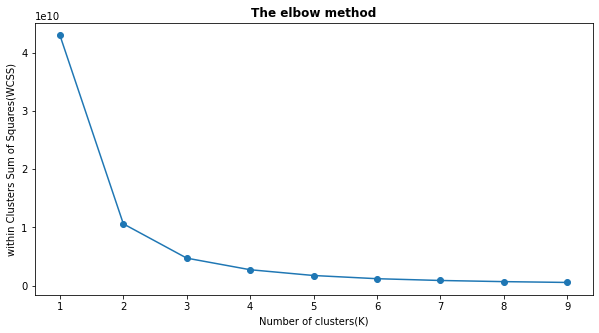

In [28]:
#Elbow method to identify the optimal number of clusters
wcss=[]
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 42)
    kmeans.fit(X)
    wcss_iter=kmeans.inertia_
    wcss.append(wcss_iter)
# Plotting the results onto a line graph to help us observe 'The Elbow'
plt.figure(figsize=(10,5))
no_clusters=range(1,10)
plt.plot(no_clusters, wcss,marker = "o")
plt.title('The elbow method', fontweight="bold")
plt.xlabel('Number of clusters(K)')
plt.ylabel('within Clusters Sum of Squares(WCSS)')

We can see that the optimal number of clusters is 3, the point that which WCSS stops decreasing drastically.

In [29]:
(X1_train, X1_test) = train_test_split(X,test_size=0.20)
# Cluster
kmeans = KMeans(3)
kmeans.fit(X1_train[['wavg']])
# Save the labels
X1_train.loc[:,'cluster_pred'] = kmeans.labels_
X1_train

,user_id,wavg,cluster_pred
51,6976,6.139645,2
4055,5485,5.953243,2
1691,4946,4.976734,1
3146,9763,6.006353,2
4028,6367,4.795791,1
...,...,...,...
4053,7558,5.484797,1
1706,4222,6.080848,2
123,7886,6.674140,2
49,5706,4.441081,0


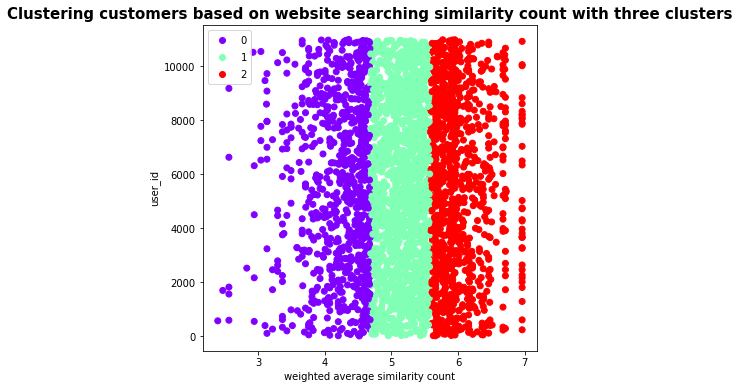

In [30]:
plt.figure(figsize=(6,6))
scatter = plt.scatter(X1_train['wavg'],X1_train['user_id'],c=X1_train['cluster_pred'],cmap='rainbow')
plt.title("Clustering customers based on website searching similarity count with three clusters", fontsize=15,fontweight="bold")
plt.xlabel("weighted average similarity count")
plt.ylabel("user_id")
plt.legend(*scatter.legend_elements())
plt.show()

We can define users into low intent, middle intent and high intent in the furture if needed.

Further Thoughts 2: If we know the timestamp searches belong to what travel order number, the time difference is also an important evaluation for wavg.